<a href="https://colab.research.google.com/github/pepamengual/jupyter_bojos/blob/master/jupyter_bojos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import random

In [0]:
import matplotlib.pyplot as plt

In [169]:
from google.colab import files
uploaded = files.upload()

Saving data_negative.txt to data_negative (1).txt
Saving data_positive_high.txt to data_positive_high (1).txt


In [0]:
valid_amino_acids = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]

In [0]:
positive_high_peptides = []
negative_peptides = []

In [0]:
positive_high_file = "data_positive_high.txt"
with open(positive_high_file, "r") as f:
  for line in f:
    peptide = line.rstrip()
    positive_high_peptides.append(peptide)

In [0]:
negative_file = "data_negative.txt"
with open(negative_file, "r") as f:
  for line in f:
    peptide = line.rstrip()
    negative_peptides.append(peptide)

In [339]:
data_in_numbers = "There are {} Positive-High and {} Negative peptides".format(len(positive_high_peptides), len(negative_peptides))

print(data_in_numbers)

There are 3595 Positive-High and 7265 Negative peptides


In [340]:
training_data_lenght = int(len(positive_high_peptides) * 0.90)
training_data_add = training_data_lenght + 1
testing_data_lenght = int(len(positive_high_peptides) - training_data_positive_high_lenght)

training_in_numbers = "Training: {}, Testing: {}".format(training_data_lenght, testing_data_lenght)
print(training_in_numbers)

Training: 3235, Testing: 899


In [341]:
random.shuffle(positive_high_peptides)

training_data_positive_high = positive_high_peptides[:training_data_add]
testing_data_positive_high = positive_high_peptides[training_data_lenght:]
print(training_data_positive_high)

['LLFNEKLKV', 'TLGVYDYLV', 'LLWHGVSTL', 'MQVFFGYFA', 'MLAKYDHLV', 'MLNFSIYSV', 'RLMRTNFLI', 'KLFTHDIML', 'FLSFASLFL', 'ALMPLYACI', 'ILLENLMRA', 'MMMLPATLA', 'LTLDEQIFV', 'FLSRLVLYA', 'TLVDICFWS', 'FVIFACNFV', 'VILAGPIPV', 'AQFLYLYAL', 'YMPYVFTLL', 'GLIACLIFV', 'FLHSGTAKS', 'ILLSCIHTT', 'GLLCISIMI', 'CMLDGGNML', 'KIDYYIPYV', 'FLGDDPSPA', 'YVASYLLAA', 'KIFGSLAFL', 'KTMAMVLSI', 'FLTSVINRV', 'FLLENAAYL', 'RLMKQDFSV', 'LLYDGSFAV', 'AMQTMLFTM', 'SLVEMMWDL', 'FLRDNLYHV', 'YLMCLSPLM', 'SLKERIDML', 'YLMAWKQVL', 'VLLPSLFLL', 'YLNKIQNSL', 'FLDPHPYYV', 'LLDPLYFEV', 'SLFSLLLVI', 'EMFGGTPAV', 'GLWVCATSL', 'MLWCKDGHV', 'KMSGKTPAV', 'MLLNVQTLI', 'YMFFVIKNL', 'YMDDVVLGV', 'YLSGTDDEV', 'LLLDRLNQL', 'YLLAVCGCI', 'SLYNTIATL', 'YLSGANLNL', 'WLKGNISPV', 'GLIYTYSGL', 'KVAELVHFL', 'GLVGVLAGL', 'ALQEAYYRA', 'TVIHLEWLL', 'KLINTLFHA', 'ILAADLEKL', 'ILVGYMSNL', 'FLIDLAFLI', 'YAAPQLFPV', 'RLVDFFPDI', 'SLFSLLPGV', 'GLIMVLSFL', 'KIFCISIFL', 'FLSDYGPQL', 'FMASPENVI', 'ALGDLFQSI', 'ALAPWQQAV', 'ILATLNTLI', 'SMVNGVVRL'

In [0]:
number_seen_positive_high_training = {}
number_seen_negative = {}

In [0]:
for i in range(9):
  for amino_acid in valid_amino_acids:
    number_seen_positive_high_training.setdefault(i, {}).setdefault(amino_acid, 1)
    number_seen_negative.setdefault(i, {}).setdefault(amino_acid, 1)

In [0]:
for peptide in training_data_positive_high:
  for position, amino_acid in enumerate(peptide):
    number_seen_positive_high_training[position][amino_acid] += 1
    
for peptide in negative_peptides:
  for position, amino_acid in enumerate(peptide):
    number_seen_negative[position][amino_acid] += 1

In [345]:
print("Positive-High -->", number_seen_positive_high_training)
print("Negative -->", number_seen_negative)

Positive-High --> {0: {'A': 234, 'C': 27, 'D': 8, 'E': 16, 'F': 496, 'G': 190, 'H': 50, 'I': 212, 'K': 261, 'L': 315, 'M': 111, 'N': 71, 'P': 4, 'Q': 60, 'R': 152, 'S': 237, 'T': 118, 'V': 188, 'W': 78, 'Y': 428}, 1: {'A': 60, 'C': 3, 'D': 1, 'E': 3, 'F': 6, 'G': 3, 'H': 2, 'I': 310, 'K': 2, 'L': 1976, 'M': 449, 'N': 1, 'P': 2, 'Q': 99, 'R': 2, 'S': 9, 'T': 124, 'V': 199, 'W': 1, 'Y': 4}, 2: {'A': 321, 'C': 45, 'D': 199, 'E': 18, 'F': 277, 'G': 95, 'H': 50, 'I': 265, 'K': 41, 'L': 485, 'M': 229, 'N': 112, 'P': 92, 'Q': 86, 'R': 19, 'S': 243, 'T': 94, 'V': 152, 'W': 137, 'Y': 296}, 3: {'A': 304, 'C': 79, 'D': 374, 'E': 280, 'F': 109, 'G': 366, 'H': 57, 'I': 84, 'K': 134, 'L': 187, 'M': 46, 'N': 163, 'P': 203, 'Q': 96, 'R': 98, 'S': 255, 'T': 180, 'V': 93, 'W': 57, 'Y': 91}, 4: {'A': 230, 'C': 68, 'D': 148, 'E': 102, 'F': 255, 'G': 249, 'H': 96, 'I': 244, 'K': 91, 'L': 346, 'M': 66, 'N': 102, 'P': 69, 'Q': 75, 'R': 93, 'S': 149, 'T': 211, 'V': 291, 'W': 103, 'Y': 268}, 5: {'A': 137, 'C':

In [0]:
frequency_seen_positive_high_training = {}
frequency_seen_negative = {}

In [0]:
for position, amino_acid_dict in number_seen_positive_high_training.items():
  for amino_acid, number_observations in amino_acid_dict.items():
    frequency = number_observations / training_data_lenght
    frequency_seen_positive_high_training.setdefault(position, {}).setdefault(amino_acid, frequency)
    
for position, amino_acid_dict in number_seen_negative.items():
  for amino_acid, number_observations in amino_acid_dict.items():
    frequency = number_observations / training_data_lenght
    frequency_seen_negative.setdefault(position, {}).setdefault(amino_acid, frequency)

In [348]:
print("Positive-High -->", frequency_seen_positive_high_training)
print("Negative -->", frequency_seen_negative)

Positive-High --> {0: {'A': 0.0723338485316847, 'C': 0.008346213292117466, 'D': 0.002472952086553323, 'E': 0.004945904173106646, 'F': 0.15332302936630604, 'G': 0.05873261205564142, 'H': 0.015455950540958269, 'I': 0.06553323029366306, 'K': 0.08068006182380216, 'L': 0.0973724884080371, 'M': 0.034312210200927354, 'N': 0.02194744976816074, 'P': 0.0012364760432766616, 'Q': 0.01854714064914992, 'R': 0.04698608964451314, 'S': 0.0732612055641422, 'T': 0.03647604327666151, 'V': 0.05811437403400309, 'W': 0.0241112828438949, 'Y': 0.13230293663060277}, 1: {'A': 0.01854714064914992, 'C': 0.0009273570324574962, 'D': 0.0003091190108191654, 'E': 0.0009273570324574962, 'F': 0.0018547140649149924, 'G': 0.0009273570324574962, 'H': 0.0006182380216383308, 'I': 0.09582689335394126, 'K': 0.0006182380216383308, 'L': 0.6108191653786708, 'M': 0.13879443585780527, 'N': 0.0003091190108191654, 'P': 0.0006182380216383308, 'Q': 0.030602782071097373, 'R': 0.0006182380216383308, 'S': 0.0027820710973724882, 'T': 0.0383

In [0]:
motif = {}

In [0]:
for position, amino_acid_dict in frequency_seen_positive_high_training.items():
  for amino_acid, frequency_positive in amino_acid_dict.items():
    frequency_negative = frequency_seen_negative[position][amino_acid]
    log_2_obs_exp = np.log2(frequency_positive/frequency_negative)
    motif.setdefault(position, {}).setdefault(amino_acid, log_2_obs_exp)

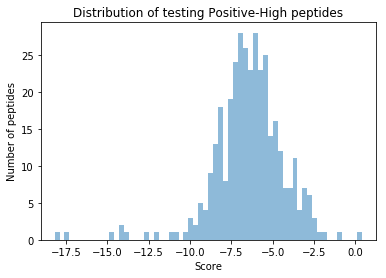

In [352]:
testing_data_values = []
for peptide in testing_data_positive_high:
  score = 0
  for position, amino_acid in enumerate(peptide):
    score += motif[position][amino_acid]
  testing_data_values.append(score)

min_values = min(testing_data_values) - 1
max_values = max(testing_data_values) + 1

bins = np.arange(-50, 50, 0.3)
plt.xlim([min_values, max_values])
plt.hist(testing_data_values, bins=bins, alpha=0.5)
plt.xlabel("Score")
plt.ylabel("Number of peptides")
plt.title("Distribution of testing Positive-High peptides")
plt.show()